# Definitions

DOES NOT WORK. DO NOT USE!

In [2]:
import Pkg
Pkg.add("Dates")
using Dates
Pkg.add("Plots")
using Plots

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [3]:
struct Cashflow
  amount::Float32 # Per month
  startDate::DateTime
  endDate::DateTime
end

struct TaxBracket
  rate::Float32
  ceiling::Float32
end

struct MarginalTax
  brackets::Vector{TaxBracket}
end

struct Rates
  inflation::Float64 # Per month
  capital::Float64 # Per month
end

# Inputs

In [4]:
currentAge = 37
currentNetWorth = 10
salaryOne = 10 # Per Year
salaryTwo = 10 # Per Year
rent = 10 # Per Month
bigMortgage = 10 # Per Month
bigHome = 10 # Per Month
smallMortgage = 10 # Per Month
smallHome = 10 # Per Month
survival = 10 - rent*12 # Per Year
living = 10 # Per Year


20000

# Calculations

In [24]:
function monthsFromNow(date::DateTime)::Float64
  length(now():Month(1):date)
end

function netFuturePrincipal(principal::Float64, m::Float64, rate::Float64)
  return principal * (1 + rate)^m
end

function netFutureOpportunity(cashflow::Cashflow, m::Float64, rate::Float64)
  return cashflow.amount * (((1 + rate)^m - 1) / rate)
end

function netFutureCashflow(cashflow::Cashflow, m::Float64, rate::Float64)
  return netFutureOpportunity(cashflow,m,rate) * (1 + rate)
end


function netFutureValueWithCeiling(cashflow::Cashflow, m::Float64, rate::Float64)
  endMonth = monthsFromNow(cashflow.endDate)
  if m < endMonth
    return netFutureCashflow(cashflow, m, rate)
  end
  return netFuturePrincipal(netFutureCashflow(cashflow, endMonth, rate), m - endMonth,rate)
end

function cashFunction(currentNetWorth::Float64, incomes::Vector{Cashflow}, expenses::Vector{Cashflow}, rates::Rates)
  function f(m::Float64)
    return (
      netFuturePrincipal(currentNetWorth, m, rates.capital) +
      sum([netFutureValueWithCeiling(income, m, rates.capital) for income in incomes]) -
      sum([netFutureValueWithCeiling(expense, m, rates.inflation) for expense in expenses]) # Actual expenses
      #sum([netFutureOpportunity(expense, m, rates.capital) for expense in expenses]) # Opportunity costs
    )
  end
  return f
end


cashFunction (generic function with 1 method)

# Analysis

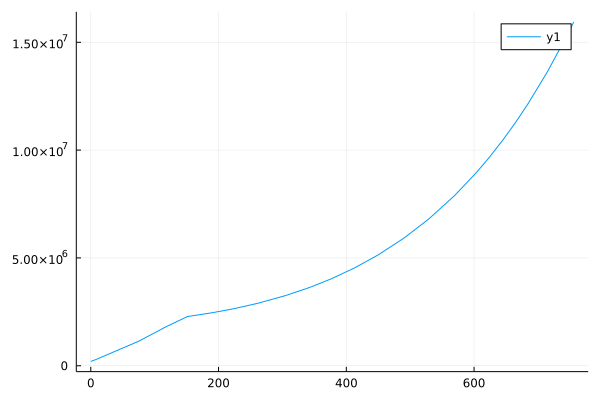

In [26]:
# Scenario: Rent Retire at 50. Conservative gains. Live infinitely.
forever = DateTime(2200,1,1)
retirementAge = 2034
salaryOneIncome = Cashflow(salaryOne/12,now(),DateTime(retirementAge,1,1))
salaryTwoIncome = Cashflow(salaryTwo/12,now(),DateTime(retirementAge,1,1))
survivalExpense = Cashflow(survival/12,now(),forever)
livingExpense = Cashflow(living/12,now(),forever)
rentExpense = Cashflow(rent,now(),forever)
rates = Rates(0.02/12, 0.04/12)
yearsToPlot = 100 - currentAge
f = cashFunction(currentNetWorth,[salaryOneIncome, salaryTwoIncome],[survivalExpense,livingExpense,rentExpense],rates)
plot(f, 0, 12*yearsToPlot)


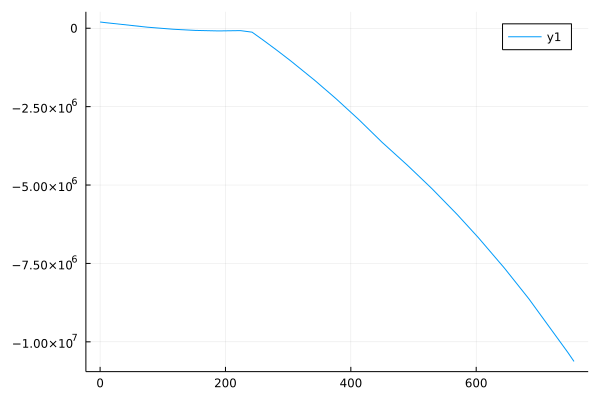

In [23]:
# Scenario: Buy big house. Conservative gains. Live infinitely.
forever = DateTime(2200,1,1)
retirementWithBigHouse = 2042
year30 = 2060
salaryOneIncome = Cashflow(salaryOne/12,now(),DateTime(retirementWithBigHouse,1,1))
salaryTwoIncome = Cashflow(salaryTwo/12,now(),DateTime(retirementWithBigHouse,1,1))
survivalExpense = Cashflow(survival/12,now(),forever)
livingExpense = Cashflow(living/12,now(),forever)
bigMortgageExpense = Cashflow(bigMortgage,now(),DateTime(year30,1,1))
bigHomeExpense = Cashflow(bigMortgage,now(),forever)
rates = Rates(0.02/12, 0.04/12)
yearsToPlot = 100 - currentAge
f = cashFunction(currentNetWorth, [salaryOneIncome, salaryTwoIncome],[survivalExpense,livingExpense,bigMortgageExpense,bigHomeExpense],rates)
plot(f, 0, 12*yearsToPlot)

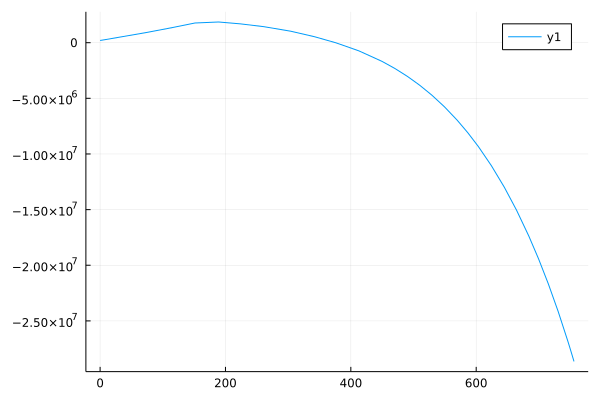

In [11]:
# Scenario: Buy small house. Conservative gains. Live infinitely.
forever = DateTime(2200,1,1)
retirementWithSmallHouse = 2036
salaryOneIncome = Cashflow(salaryOne/12,now(),DateTime(retirementWithSmallHouse,1,1))
salaryTwoIncome = Cashflow(salaryTwo/12,now(),DateTime(retirementWithSmallHouse,1,1))
survivalExpense = Cashflow(survival/12,now(),forever)
livingExpense = Cashflow(living/12,now(),forever)
smallMortgageExpense = Cashflow(smallMortgage,now(),DateTime(year30,1,1))
smallHomeExpense = Cashflow(smallMortgage,now(),forever)
rates = Rates(0.02/12, 0.04/12)
yearsToPlot = 100 - currentAge
f = cashFunction(currentNetWorth, [salaryOneIncome, salaryTwoIncome],[survivalExpense,livingExpense,smallMortgageExpense,smallHomeExpense],rates)
plot(f, 0, 12*yearsToPlot)